In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Display first few rows
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [59]:
#Checking for non stationary data
result=adfuller(df['Passengers'])
print(f"P value is {result[1]}")
if result[1] <= 0.05:
    print("The data is stationary (reject H0)")
else:
    print("The data is non-stationary (fail to reject H0)")

P value is 0.9899727392784442
The data is non-stationary (fail to reject H0)


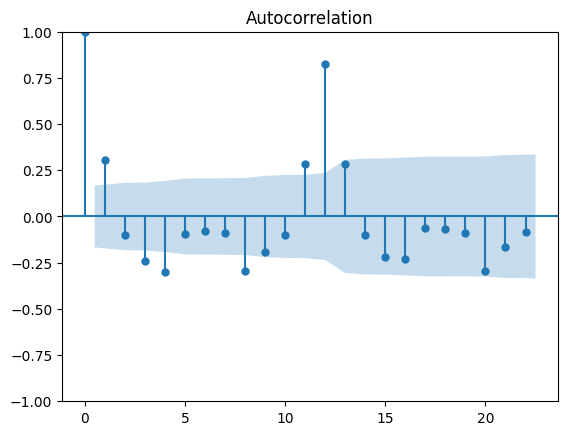

In [21]:
# plot acf and pacf
df['diff'] = df["Passengers"] - df['Passengers'].shift(1)
df.dropna(inplace=True)
plot_acf(df['diff'])
plt.show()

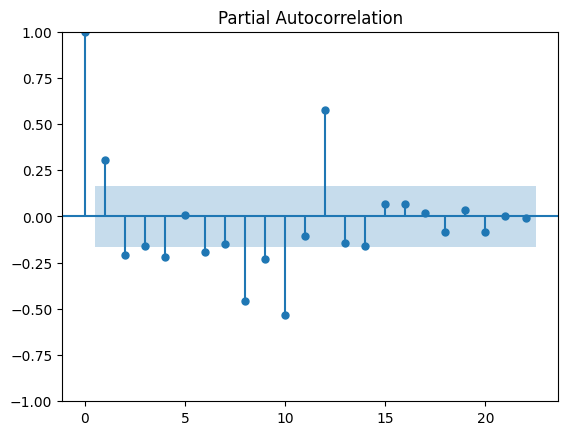

In [22]:
plot_pacf(df['diff'])
plt.show()

In [ ]:
df = df.asfreq('MS') 
model = ARIMA(df['Passengers'],order=(2,1,2))
fitted_model = model.fit()

In [64]:
forecast = fitted_model.forecast(steps=12)

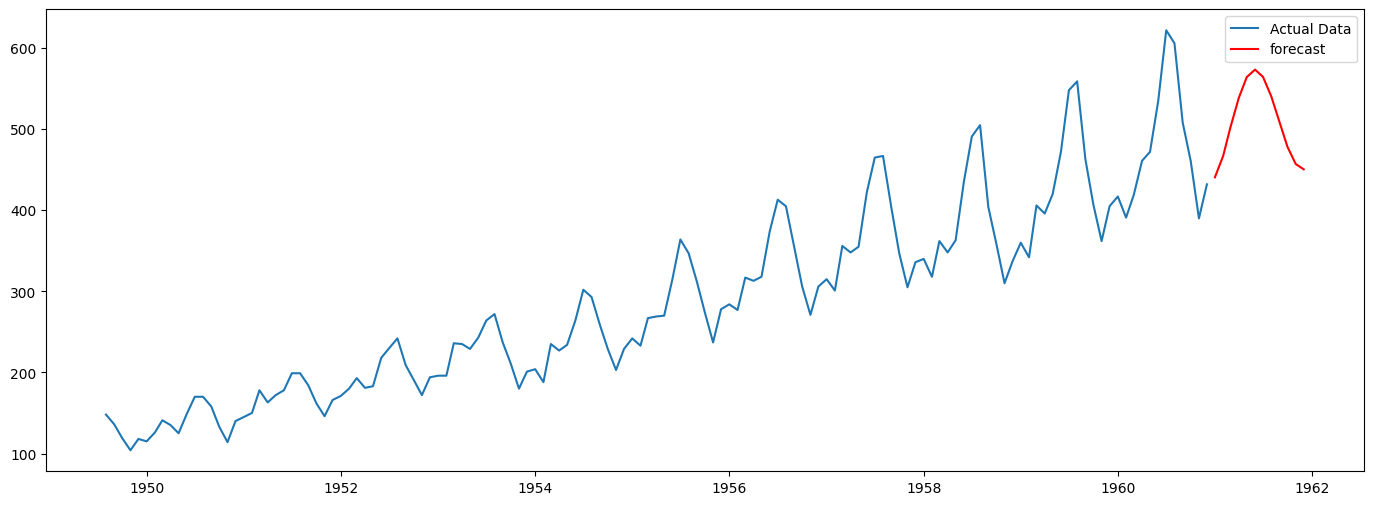

In [65]:
plt.figure(figsize=(17,6))
plt.plot(df['Passengers'],label="Actual Data")
plt.plot(pd.date_range(df.index[-1],periods=12,freq='ME'),forecast,label="forecast",color="red")
plt.legend()
plt.show()

In [56]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  137
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -641.946
Date:                Mon, 28 Apr 2025   AIC                           1293.892
Time:                        00:41:21   BIC                           1308.455
Sample:                    08-01-1949   HQIC                          1299.810
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6838      0.021     78.556      0.000       1.642       1.726
ar.L2         -0.9537      0.018    -52.439      0.000      -0.989      -0.918
ma.L1         -1.8432      0.105    -17.491      0.000      -2.050      -1.637
ma.L2          0.9937      0.114      8.706      0.000       0.770       1.217
sigma2       697.7770    110.905      6.292      0.000     480.408     915.146
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):                 1.71
Prob(Q):                              0.57   Prob(JB):                         0.42
Heteroskedasticity (H):               6.76   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/aarya/stuff/college/sem 6/lab/dav/dav_pracs/.venv/lib64/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/aarya/stuff/college/sem 6/lab/dav/dav_pracs/.venv/lib64/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/aarya/stuff/college/sem 6/lab/dav/dav_pracs/.venv/lib64/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/aarya/stuff/college/sem 6/lab/dav/dav_pracs/.venv/lib64/python3.13/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting

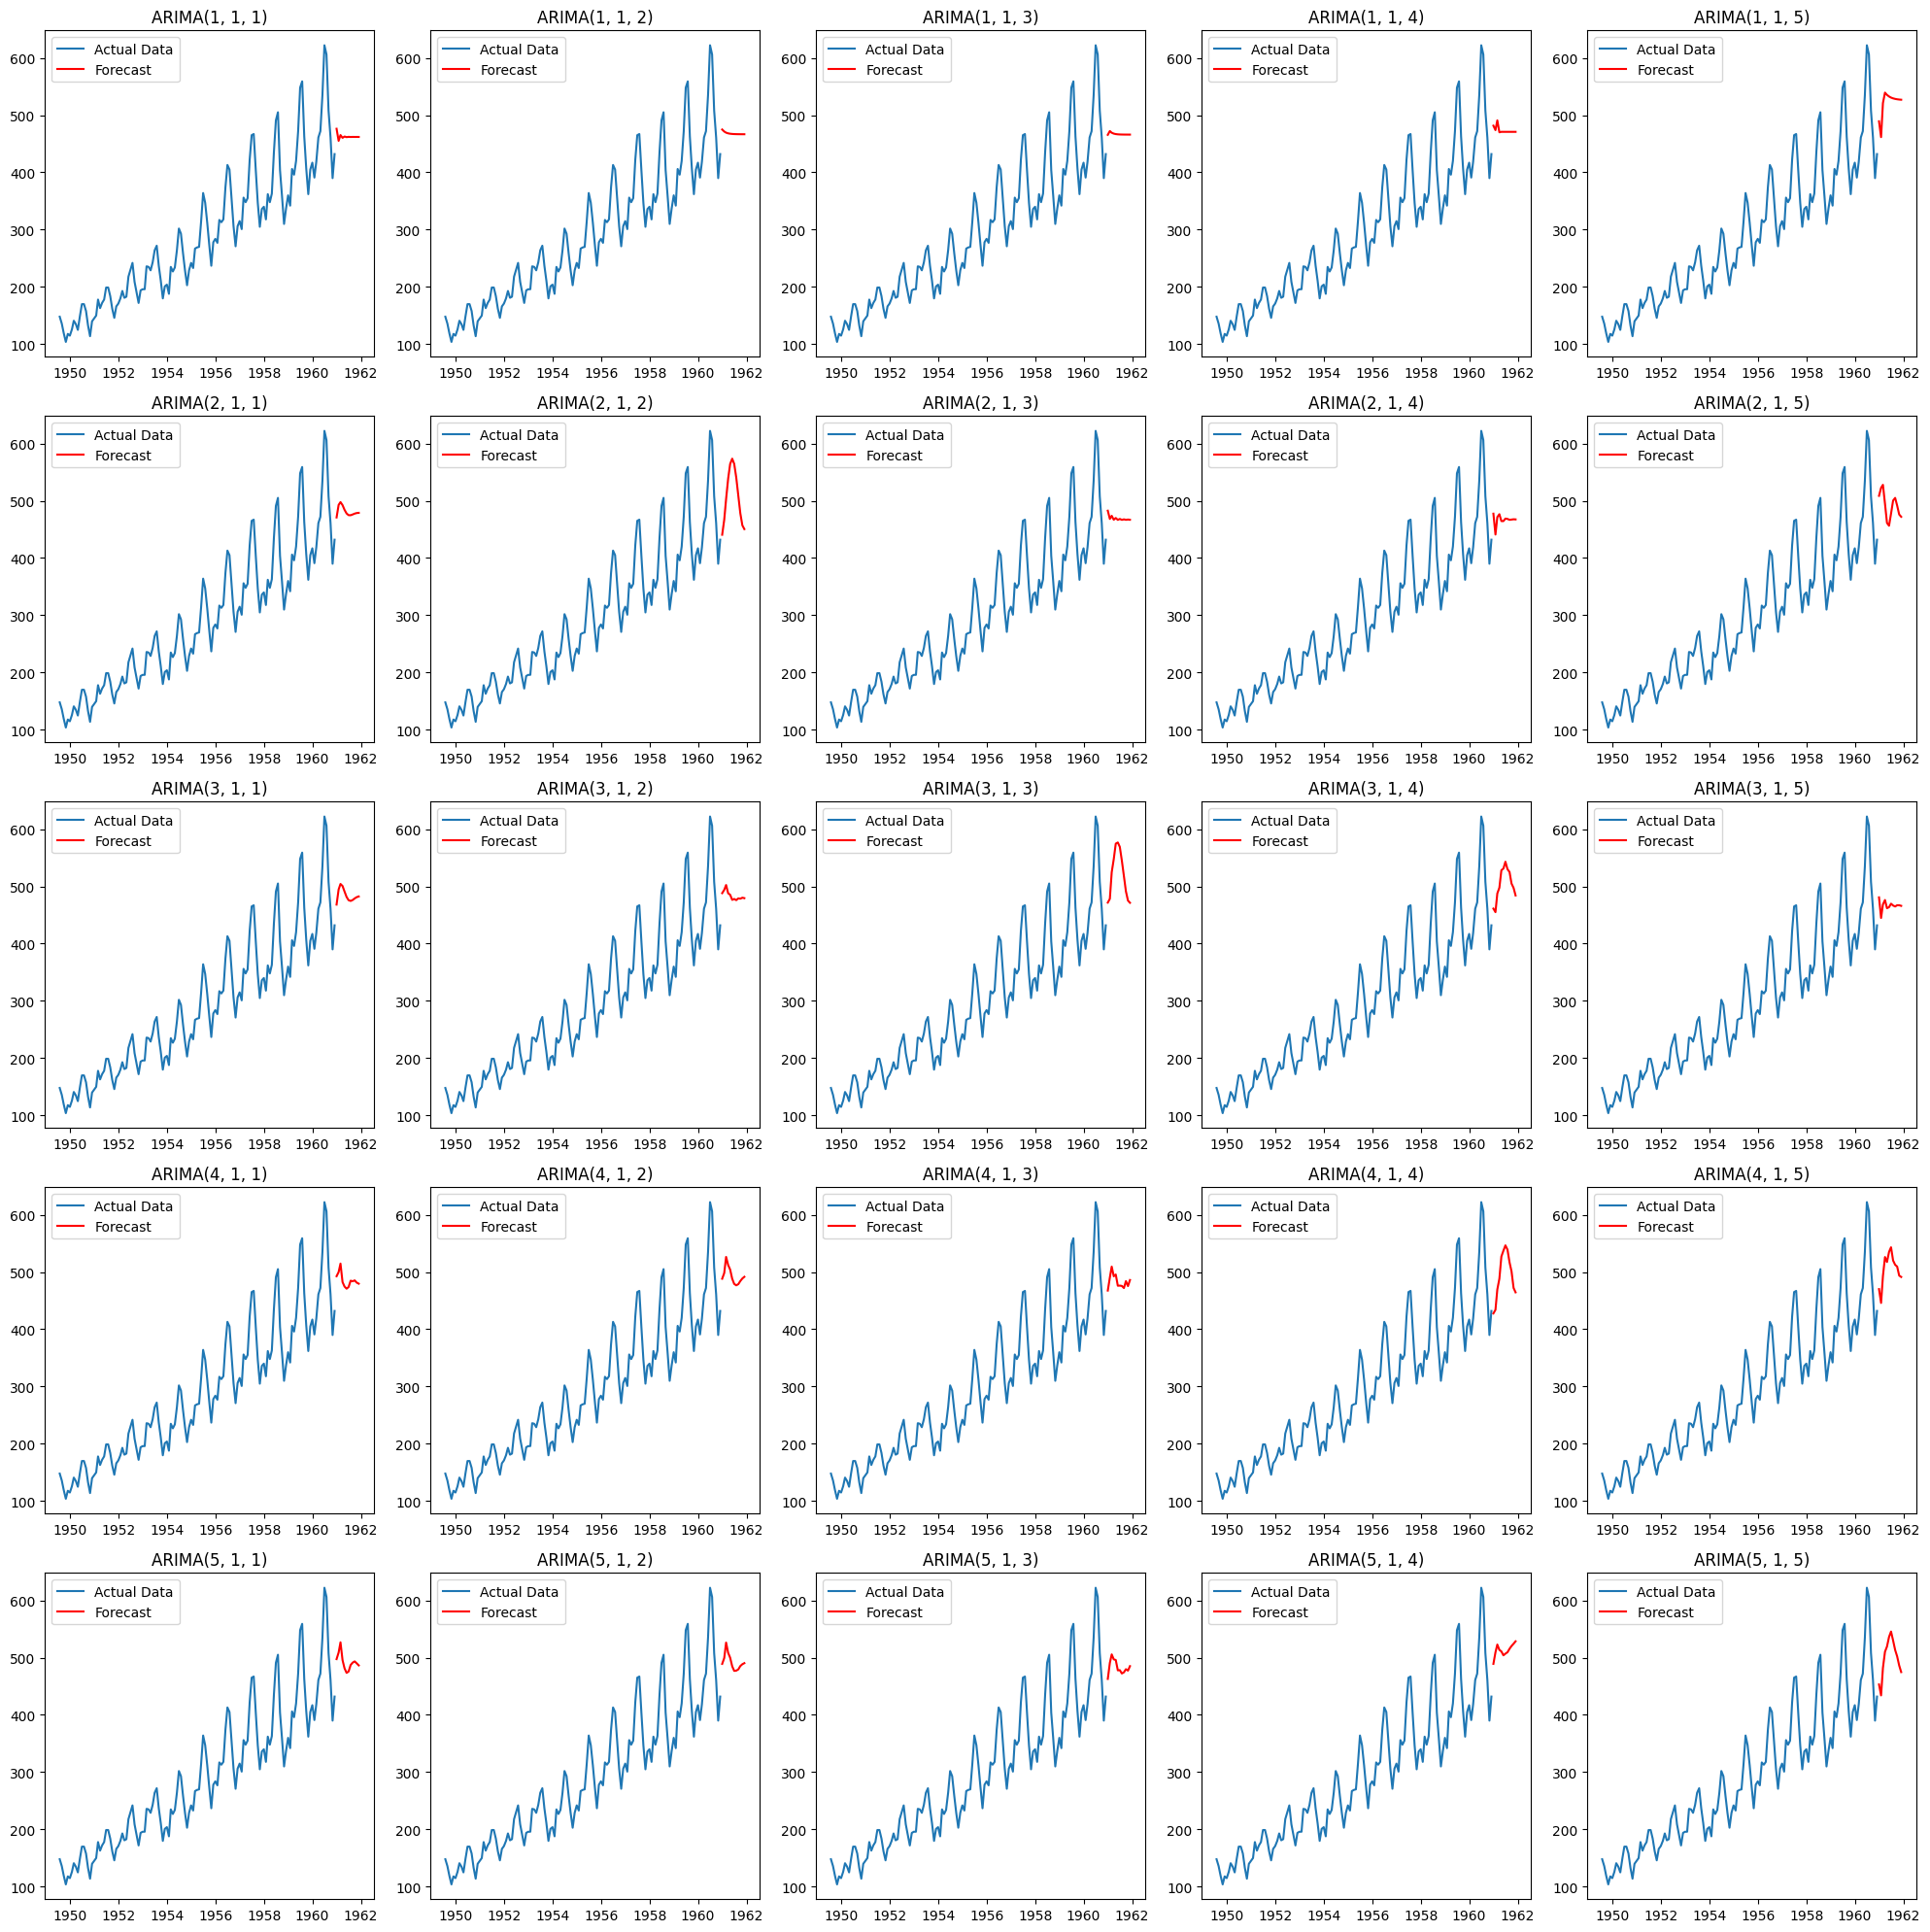

In [70]:
p_values = range(1, 6)
d_values = range(1, 6)
q_values = range(1, 6)

# Create a figure for the grid of plots
fig, axes = plt.subplots(len(p_values), len(q_values), figsize=(20, 20))

# Loop over all combinations of p, d, q
for i, p in enumerate(p_values):
    for j, q in enumerate(q_values):
        ax = axes[i, j]

        try:
            # Fit ARIMA model
            model = ARIMA(df['Passengers'], order=(p, 1, q))  # Assuming d = 1 (for first differencing)
            fitted_model = model.fit()

            # Forecast next 12 periods
            forecast = fitted_model.forecast(steps=12)
            forecast_index = pd.date_range(df.index[-1], periods=12, freq='ME')

            # Plot the actual data and forecast
            ax.plot(df['Passengers'], label="Actual Data")
            ax.plot(forecast_index, forecast, label="Forecast", color="red")
            ax.set_title(f"ARIMA({p}, 1, {q})")
            ax.legend()
        except Exception as e:
            # In case any model fails to fit, we leave the plot empty
            ax.set_title(f"ARIMA({p}, 1, {q}) - Error")
            ax.text(0.5, 0.5, f"Error: {str(e)}", ha='center', va='center')

# Adjust layout for better readability
plt.tight_layout()
plt.show()
